# File to make plots

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
import numpy as np
import xarray as xr
import pandas as pd

## Boxplots

Hans area daily 

In [1]:
alphaMonths = ["jan", "feb", "mar", "apr", "may", "jun",
               "jul", "aug", "sep", "oct", "nov", "dec"]

In [43]:
def plot_boxplot(data_array, threshold, path, title):
    """
    Creates a boxplot using Seaborn, grouping values by month.
    Annotates values exceeding 0.35 with their corresponding date.

    :param data_array: xarray.DataArray with a 'time' dimension and numeric values.
    """
    # Convert time coordinates to Pandas DateTimeIndex
    time_index = pd.to_datetime(data_array.time.values)

    # Create a DataFrame with values and corresponding months
    df = pd.DataFrame({"time": time_index, "value": data_array.values})
    df["month"] = df["time"].dt.month
    df["month_name"] = df["time"].dt.strftime("%B")  # Full month names

    # Define the month order for correct display
    month_order = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]

    # Create the boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="month_name", y="value", data=df, order=month_order)

    # Annotate values greater than threshold
    for _, row in df[df["value"] > threshold].iterrows():
        plt.text(
            x=month_order.index(row["month_name"]) + 0.1,  # Position on the X-axis
            y=row["value"],
            s=row["time"].strftime("%Y-%m-%d"),  # Date label
            fontsize=9,
            color="red",
            ha="left"
        )

    # Customize plot appearance
    plt.title(title, fontsize=14)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    plt.savefig(path)

    plt.show()

In [5]:
dailyValues = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg_0.5_daily.nc')
mean2Values = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean2_0.5_daily.nc')
mean3Values = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean3_0.5_daily.nc')

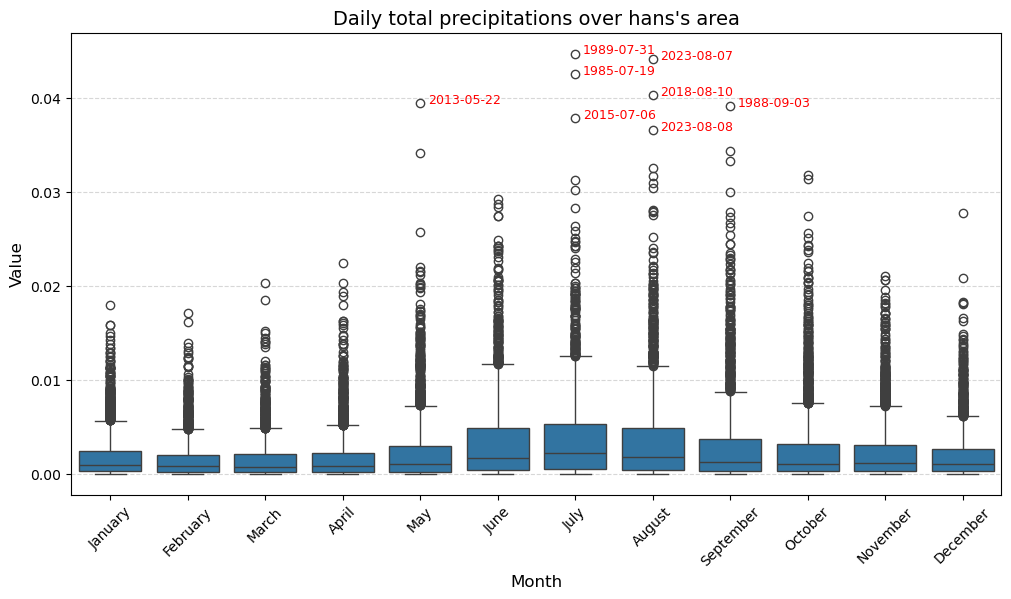

In [44]:
plot_boxplot(dailyValues, 0.035, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/daily_tp_hans-area.png', "Daily total precipitations over hans's area")

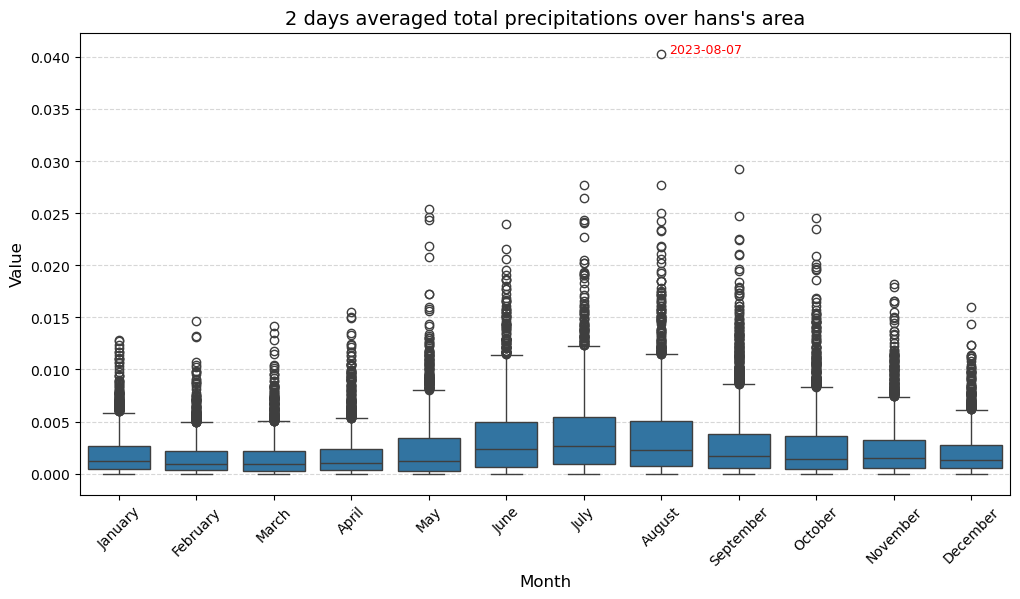

In [39]:
plot_boxplot(mean2Values, 0.03, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/mean2_tp_hans-area.png', "2 days averaged total precipitations over hans's area")

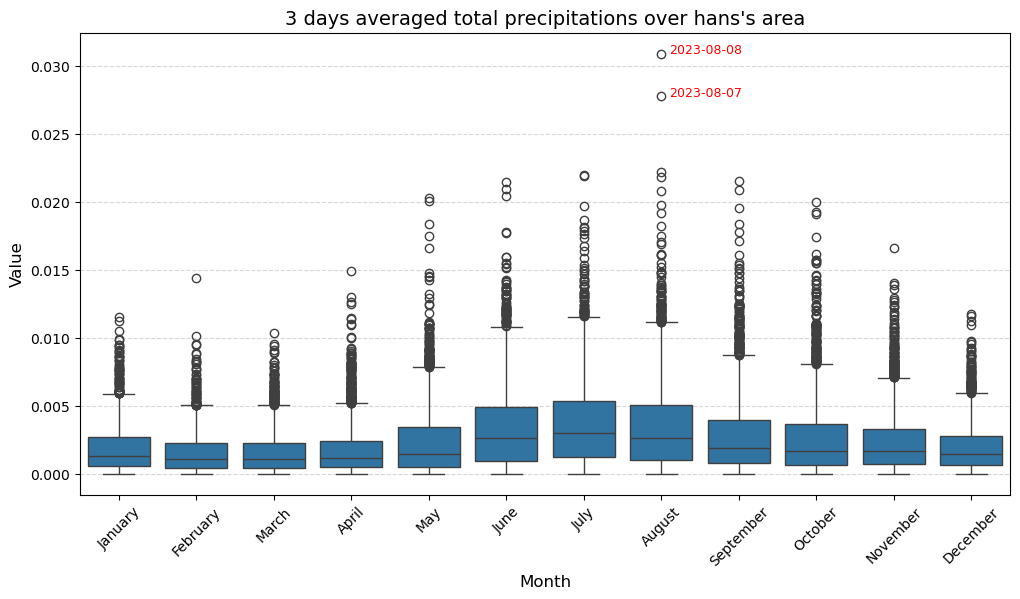

In [40]:
plot_boxplot(mean3Values, 0.025, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/mean3_tp_hans-area.png', "3 days averaged total precipitations over hans's area")

In [49]:
def plot_max_boxplot(data, threshold, path, title):
    """
    Trace un boxplot à partir d'un dictionnaire dont les clés sont les 12 mois
    et les valeurs sont des listes de paires (valeur, date).
    Affiche les dates des valeurs dépassant threshold.
    """
    months = list(data['months'].values)
    years = list(data['years'].values)
    values = [list(data.sel(months=month).values) for month in months]

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=values)
    
    # Ajout des annotations pour les valeurs dépassant threshold
    for month_idx, month in enumerate(months):
        for year_idx, year in enumerate(years):
            val = data.sel(months=month, years=year).values
            if val > threshold:
                plt.text(month_idx+0.1, val, year, ha='left', fontsize=8, color='red')
    
    plt.xticks(ticks=range(len(months)), labels=months, rotation=45)
    plt.xlabel("Months")
    plt.ylabel("Precipitations (m)")
    plt.title(title)
    
    plt.savefig(path)

    plt.show()

In [46]:
maxDailyValues = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-daily_0.5_monthly-max')
maxMean2Values = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean2_0.5_monthly-max')
maxMean3Values = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean3_0.5_monthly-max')

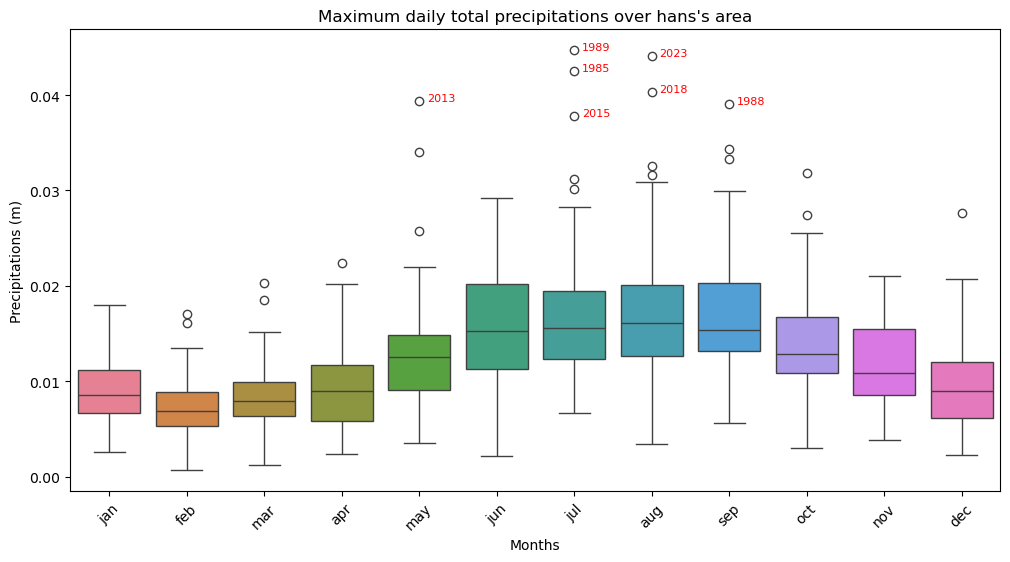

In [50]:
plot_max_boxplot(maxDailyValues, 0.035, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/max-daily_tp_hans-area.png', "Maximum daily total precipitations over hans's area")

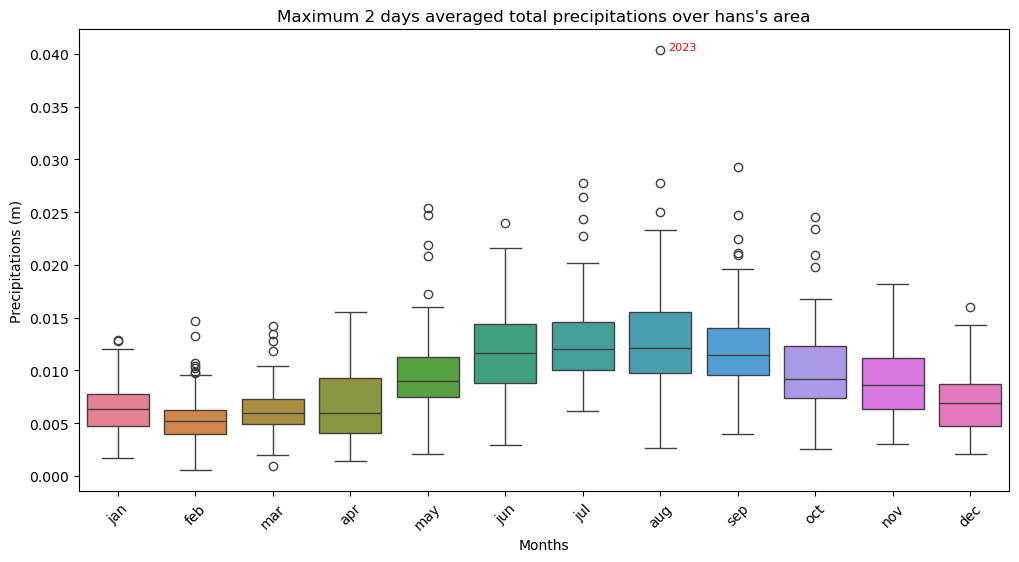

In [52]:
plot_max_boxplot(maxMean2Values, 0.03, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/max-mean2_tp_hans-area.png', "Maximum 2 days averaged total precipitations over hans's area")

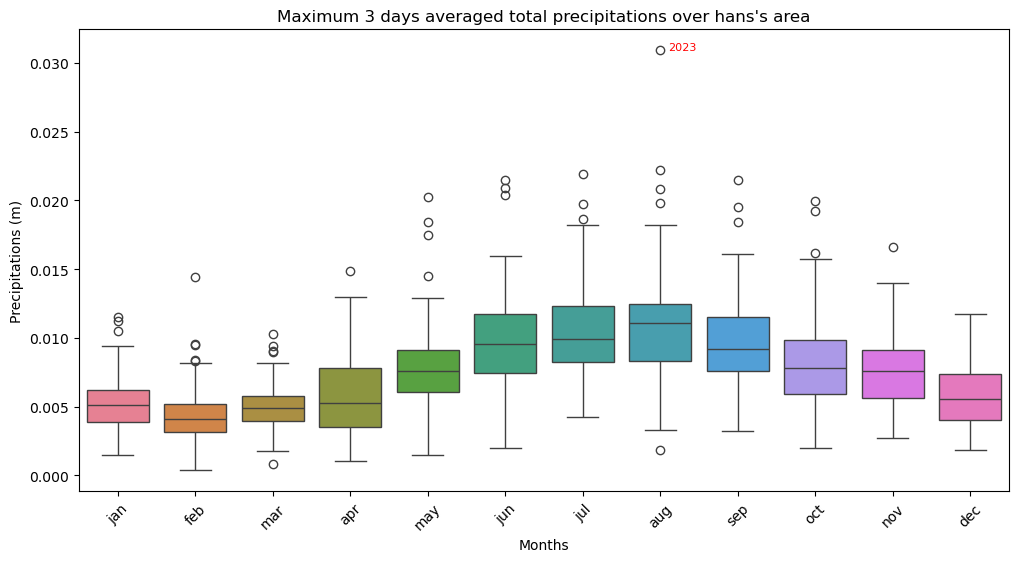

In [53]:
plot_max_boxplot(maxMean3Values, 0.025, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/max-mean3_tp_hans-area.png', "Maximum 3 days averaged total precipitations over hans's area")

## Plot tp / date

In [54]:
def plot_values(dates_values, path, title):
    """
    Trace un graphique des valeurs en fonction des dates avec des marques chaque semaine.
    
    :param dates_values: Liste de tuples (valeur, date) où date est une chaîne au format 'YYYY-MM-DD'
    """
    # Trier les données par date
    dates_values.sort(key=lambda x: x[1])
    
    # Séparer les valeurs et les dates
    values = [val for val, _ in dates_values]
    dates = [date for _, date in dates_values]
    
    # Déterminer la première date pour numéroter les semaines
    min_date = min(dates)
    
    # Identifier les lundis et leurs numéros de semaine
    week_labels = {}
    for date in dates:
        delta_time = (date - min_date).astype('datetime64[D]').astype(int)
        week_number = (delta_time // 7) + 1
        if (delta_time % 7) == 0:  # Lundi
            week_labels[date] = f"Week {week_number}"
    
    # Création du graphique
    plt.figure(figsize=(12, 6))
    plt.plot(dates, values, marker='o', linestyle='-')
    
    # Formatage de l'axe des abscisses
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Marques pour chaque jour
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format par défaut
    plt.xticks(ticks=list(week_labels.keys()), labels=list(week_labels.values()), rotation=45)
    
    plt.ylabel("total precipitation (m)")
    plt.title(title)
    
    plt.grid(True)
    plt.savefig(path)
    plt.show()

In [55]:
data = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg_0.5_daily.nc')

In [57]:
hans_august = [
    (float(data.sel(time=day)),day) for day in np.arange(np.datetime64('2023-08'), np.datetime64('2023-09'), np.timedelta64(1,'D'))
]

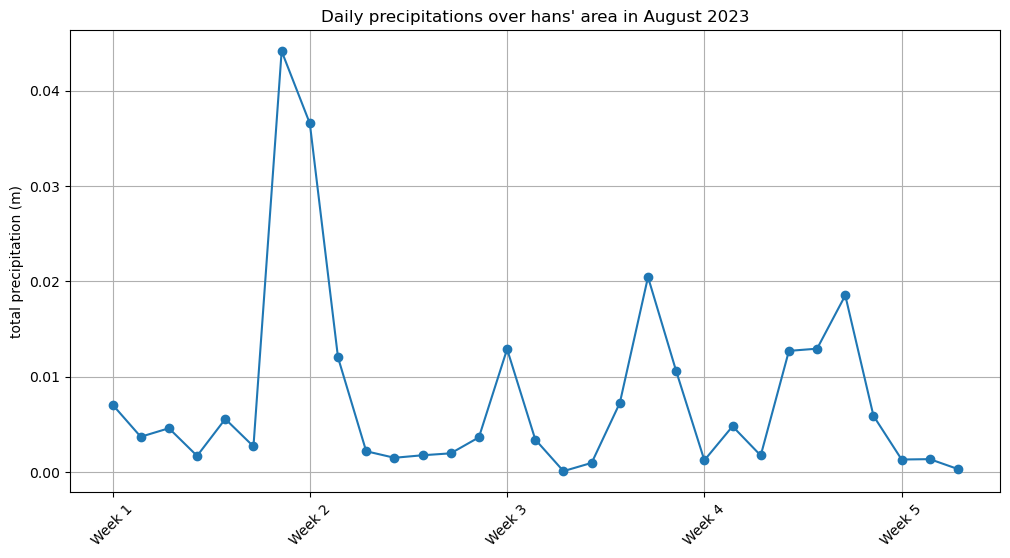

In [58]:
plot_values(hans_august, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/august-daily_tp_hans-area.png', "Daily precipitations over hans' area in August 2023")

In [59]:
alphaMonths = {
    1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"jun",
    7:"jul", 8:"aug", 9:"sep", 10:"oct", 11:"nov", 12:"dec" 
}

In [60]:
def plot_annual(dates_values, path, title):
    """
    Trace un graphique des valeurs en fonction des dates avec des marques pour chaque jour,
    mais n'affiche que le premier du mois sous le format du nom du mois.

    :param dates_values: Liste de tuples (valeur, date) où date est au format np.datetime64
    """
    # Trier les données par date
    dates_values.sort(key=lambda x: x[1])

    # Séparer les valeurs et les dates
    values = [val for val, _ in dates_values]
    dates = np.array([date for _, date in dates_values], dtype='datetime64[D]')

    # Trouver le premier jour de chaque mois
    unique_months = np.unique(dates.astype('datetime64[M]'))
    first_days = np.array([np.datetime64(f"{str(m)}-01") for m in unique_months])

    # Création du graphique
    plt.figure(figsize=(12, 6))
    plt.bar(dates, values, width=np.timedelta64(1, 'D'), align='center')  # Barres de 1 jours de large

    # Formatage de l'axe des abscisses
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Marques pour chaque jour
    plt.xticks(ticks=first_days, labels=[alphaMonths[m.astype(int) % 12 + 1] for m in unique_months], rotation=45)

    plt.ylabel("Total precipitation (m)")
    plt.title(title)

    plt.grid(True)
    plt.savefig(path)
    plt.show()


In [61]:
hans_2023 = [
    (float(data.sel(time=day)),day) for day in np.arange(np.datetime64('2023'), np.datetime64('2024'), np.timedelta64(1,'D'))
]

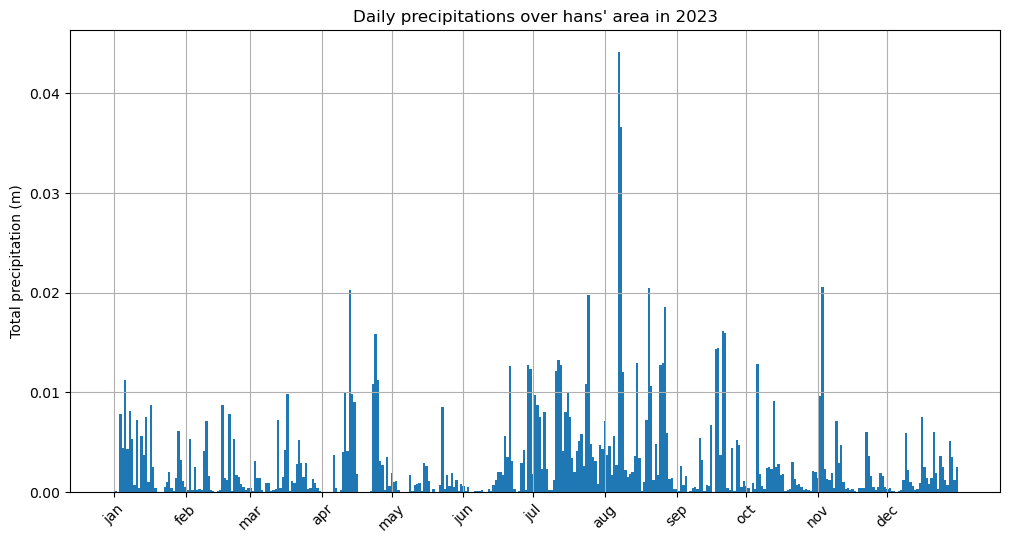

In [62]:
plot_annual(hans_2023, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/2023-daily_tp_hans-area.png', "Daily precipitations over hans' area in 2023")

In [63]:
hans_mean2_august = [
    (float(mean2Values.sel(time=day)),day) for day in np.arange(np.datetime64('2023-08'), np.datetime64('2023-09'), np.timedelta64(1,'D'))
]
hans_mean2_2023 = [
    (float(mean2Values.sel(time=day)),day) for day in np.arange(np.datetime64('2023'), np.datetime64('2024'), np.timedelta64(1,'D'))
]
hans_mean3_august = [
    (float(mean3Values.sel(time=day)),day) for day in np.arange(np.datetime64('2023-08'), np.datetime64('2023-09'), np.timedelta64(1,'D'))
]
hans_mean3_2023 = [
    (float(mean3Values.sel(time=day)),day) for day in np.arange(np.datetime64('2023'), np.datetime64('2024'), np.timedelta64(1,'D'))
]

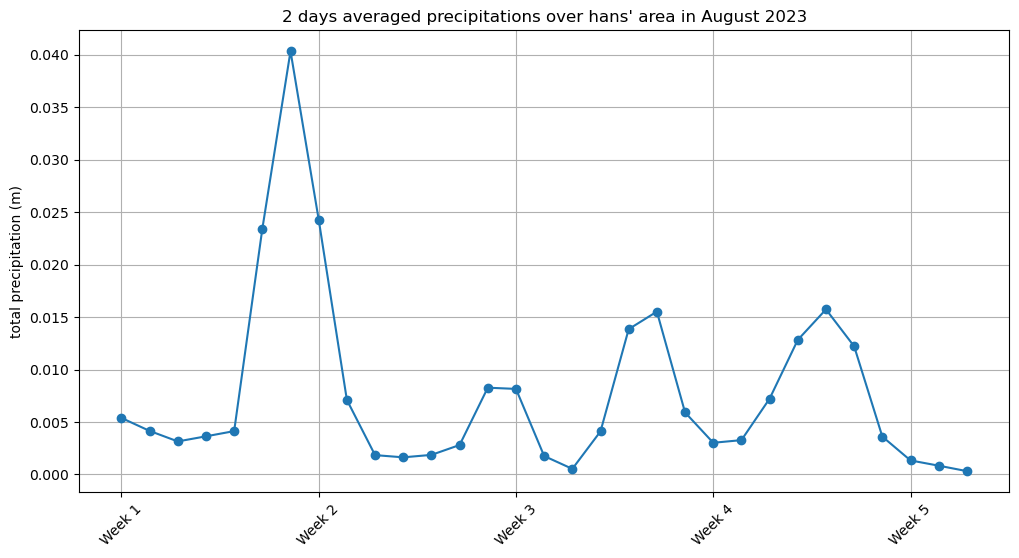

In [64]:
plot_values(hans_mean2_august, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/august-mean2_tp_hans-area.png', "2 days averaged precipitations over hans' area in August 2023")

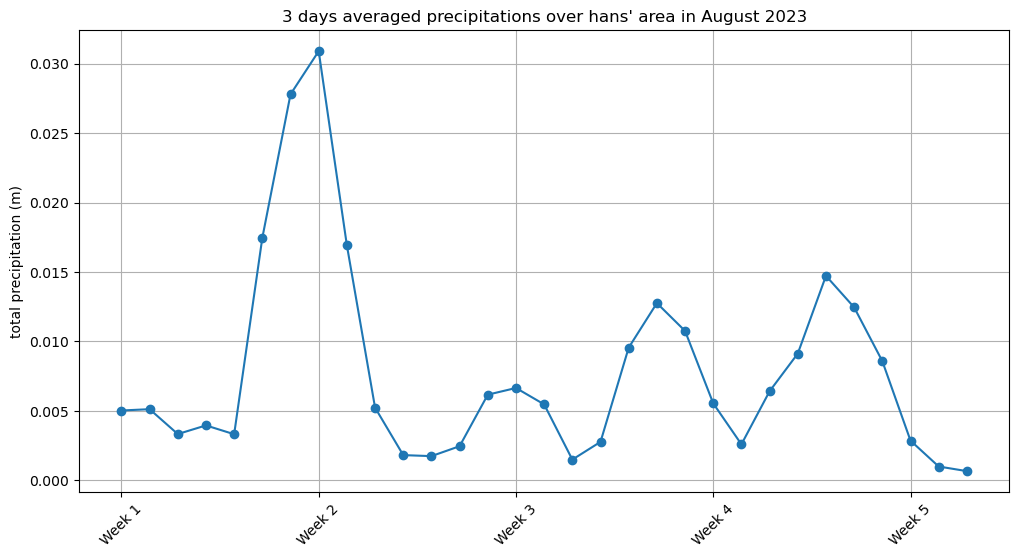

In [65]:
plot_values(hans_mean3_august, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/august-mean3_tp_hans-area.png', "3 days averaged precipitations over hans' area in August 2023")

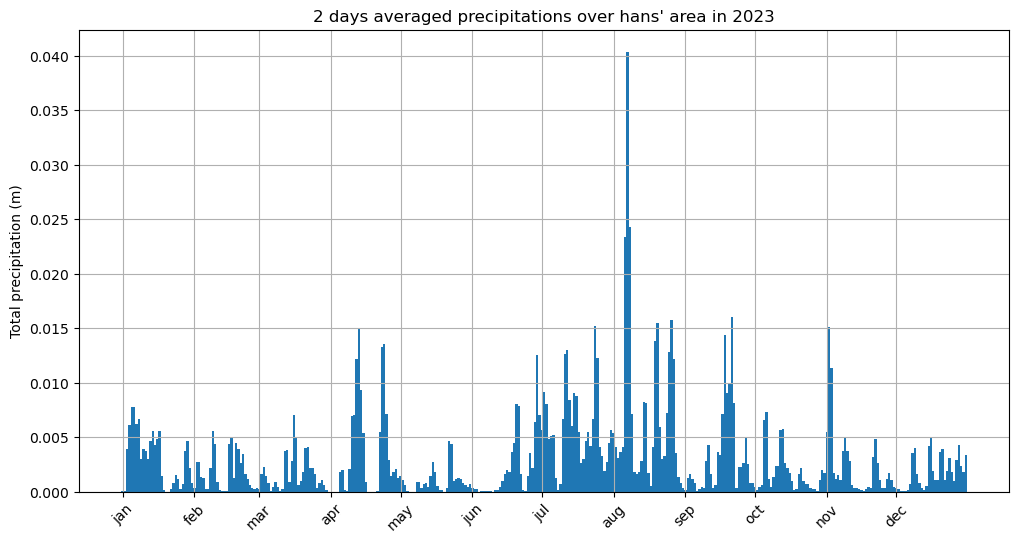

In [66]:
plot_annual(hans_mean2_2023, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/2023-mean2_tp_hans-area.png', "2 days averaged precipitations over hans' area in 2023")

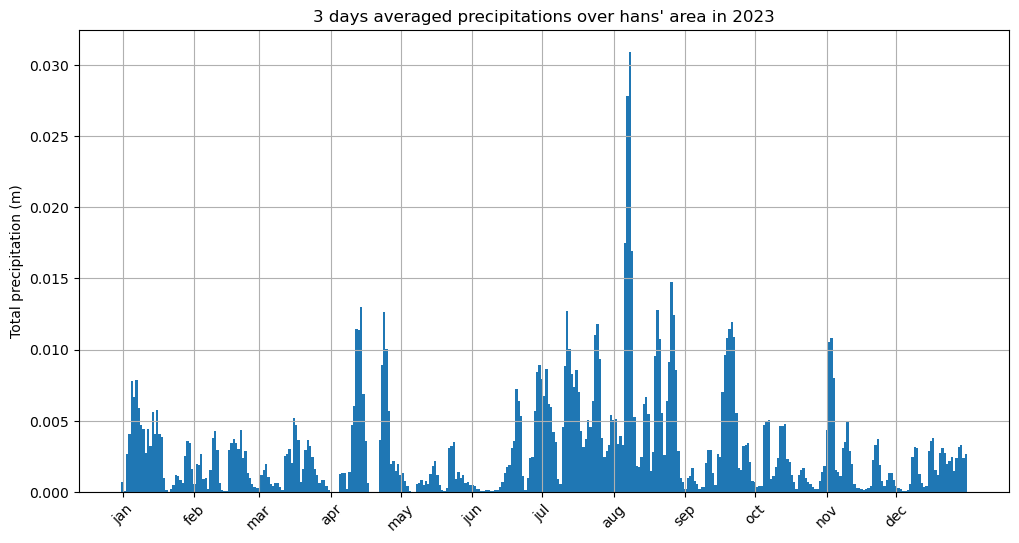

In [67]:
plot_annual(hans_mean3_2023, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/2023-mean3_tp_hans-area.png', "3 days averaged precipitations over hans' area in 2023")